# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [4]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

# Question 1

**Explain how you solve the model**

In [5]:
# code for solving the model (remember documentation and comments)

a = np.array([1,2,4])
b = inauguralproject.square(a)
print(b)

[ 1  4 16]


In [6]:
# Define utility functions
def u_A(x_A1, x_A2, alpha):
    return x_A1 **alpha * x_A2 ** (1-alpha)

def u_B(x_B1, x_B2, beta):
    return x_B1 ** beta * x_B2 ** (1-beta)

In [7]:
# Define endowment points
omega_A1 = 0.8
omega_A2 = 0.3
omega_B1 = 1 - omega_A1
omega_B2 = 1 - omega_A2

In [8]:
# Define alpha and beta
alpha = 1/3
beta = 2/3

In [9]:
# Define the grid for p1 and p2
N = 75
x_A1_values = [i/N for i in range(N+1)]
x_A2_values = [i/N for i in range(N+1)]

In [12]:
# Initialize list to store Pareto improvements
pareto_improvements = []

# Iterate over combinations
for x_A1 in x_A1_values:
    for x_A2 in x_A2_values:
        x_B1 = 1 - x_A1
        x_B2 = 1 - x_A2
        
        # Check if the combination is a Pareto improvement
        if (u_A(x_A1, x_A2, alpha) > u_A(omega_A1, omega_A2, alpha) and
            u_B(x_B1, x_B2, beta) > u_B(omega_B1, omega_B2, beta)):
            pareto_improvements.append((x_A1, x_A2))

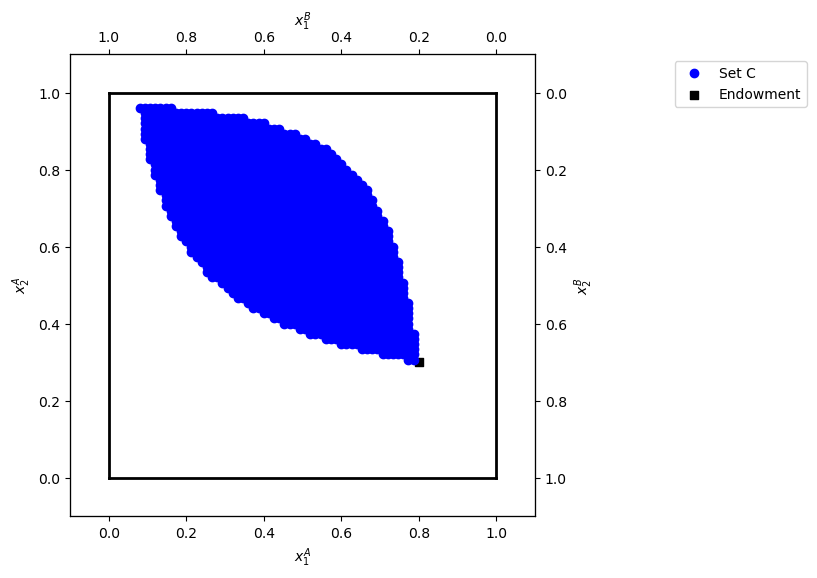

In [14]:
import matplotlib.pyplot as plt
# Plot the Edgeworth box and the set C
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Extract x_A1 and x_A2 from pareto_improvements
pareto_improvements_x_A1 = [allocation[0] for allocation in pareto_improvements]
pareto_improvements_x_A2 = [allocation[1] for allocation in pareto_improvements]

# Plot the set C
ax_A.plot(pareto_improvements_x_A1, pareto_improvements_x_A2, 'bo', label='Set C')

# Plot the initial endowment
ax_A.scatter(omega_A1, omega_A2, marker='s', color='black', label='Endowment')

# Plot the boundaries of the Edgeworth box
ax_A.plot([0, 1], [0, 0], lw=2, color='black')
ax_A.plot([0, 1], [1, 1], lw=2, color='black')
ax_A.plot([0, 0], [0, 1], lw=2, color='black')
ax_A.plot([1, 1], [0, 1], lw=2, color='black')

# Set limits
ax_A.set_xlim([-0.1, 1.1])
ax_A.set_ylim([-0.1, 1.1])
ax_B.set_xlim([1.1, -0.1])
ax_B.set_ylim([1.1, -0.1])

# Add legend
ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

plt.show()



# Question 2

Explain your code and procedure

In [ ]:
# code
from Exchange import ExchangeEconomyClass as eec

eec.check_



AttributeError: type object 'ExchangeEconomyClass' has no attribute 'check_'

In [ ]:
# Define the grid for p1 and p2
N = 75
P1 = [0.5+2*i/N for i in range(N+1)]
p2 = 1  # Numeraire is p2 = 1

In [15]:
# Define alpha and beta
alpha = 1/3
beta = 2/3

# Initialize lists to store errors
errors_1 = []
errors_2 = []
# Iterate over each value of p1
for p1 in P1:
    # Calculate demand for both goods for consumer A
    x_A1_star = alpha * (p1 * omega_A1 + omega_A2 * p2) / p1
    x_A2_star = (1 - alpha) * (p1 * omega_A1 + omega_A2 * p2) / p2
    
    # Calculate demand for both goods for consumer B
    x_B1_star = beta * (p1 * omega_B1 + omega_B2* p2) / p1
    x_B2_star = (1 - beta) * (p1 * omega_B1 + omega_B2 * p2) / p2

# Calculate errors in market clearing conditions
    error_1 = x_A1_star - omega_A1 + x_B1_star - omega_B1
    error_2 = x_A2_star - omega_A2 + x_B2_star - omega_B2
    
    # Append errors to the lists
    errors_1.append(error_1)
    errors_2.append(error_2)

# Print errors
print("Errors in market clearing conditions:")
for i, p1 in enumerate(P1):
    print(f"For p1 = {p1}:")
    print(f"Error 1: {errors_1[i]}")
    print(f"Error 2: {errors_2[i]}")
    print()


Errors in market clearing conditions:
For p1 = 0.5:
Error 1: 0.533333333333333
Error 2: -0.2666666666666666

For p1 = 0.5266666666666666:
Error 1: 0.47594936708860747
Error 2: -0.25066666666666654

For p1 = 0.5533333333333333:
Error 1: 0.42409638554216855
Error 2: -0.23466666666666652

For p1 = 0.58:
Error 1: 0.3770114942528735
Error 2: -0.2186666666666665

For p1 = 0.6066666666666667:
Error 1: 0.33406593406593377
Error 2: -0.2026666666666665

For p1 = 0.6333333333333333:
Error 1: 0.2947368421052629
Error 2: -0.18666666666666654

For p1 = 0.66:
Error 1: 0.2585858585858586
Error 2: -0.1706666666666664

For p1 = 0.6866666666666666:
Error 1: 0.22524271844660193
Error 2: -0.1546666666666665

For p1 = 0.7133333333333334:
Error 1: 0.19439252336448576
Error 2: -0.1386666666666665

For p1 = 0.74:
Error 1: 0.16576576576576557
Error 2: -0.12266666666666659

For p1 = 0.7666666666666666:
Error 1: 0.13913043478260856
Error 2: -0.10666666666666658

For p1 = 0.7933333333333333:
Error 1: 0.11428571428

# Question 3

Explain your code and procedure

In [16]:
# Define demand functions for both consumers
def demand_A(p1):
    x_A1 = alpha * (p1 * omega_A1 + omega_A2) / p1
    return x_A1

def demand_B(p1):
    x_B1 = beta * (p1 * omega_B1 + omega_B2) / p1
    return x_B1

# Define supply functions
def supply_A(p1):
    return omega_A1

def supply_B(p1):
    return omega_B1

# Define a function to calculate the market clearing price
def market_clearing_price():
    # Define a range of prices
    prices = np.linspace(0.5, 2.5, num=1000)
    
    # Iterate over prices to find the one where quantity demanded equals quantity supplied
    for p1 in prices:
        if demand_A(p1) + demand_B(p1) == supply_A(p1) + supply_B(p1):
            return p1
    
    return None  # Return None if no market clearing price is found

# Find the market clearing price
clearing_price = market_clearing_price()

# Print the result
if clearing_price is not None:
    print("The market clearing price is:", clearing_price)
else:
    print("No market clearing price found in the given range of prices.")



The market clearing price is: 0.9444444444444444


ADD CONCISE CONLUSION.

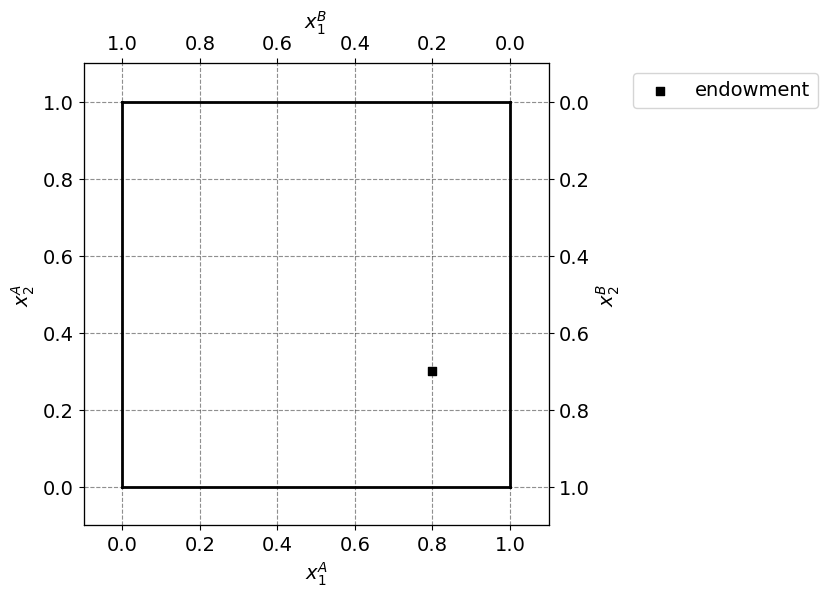

In [ ]:

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})


from Exchange import ExchangeEconomyClass


model = ExchangeEconomyClass()


par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));